# Alpaca Demo

In [16]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [17]:
# Load .env environment variables
load_dotenv()

True

In [18]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [19]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Key type: {type(alpaca_api_key)}")
print(f"Secret type: {type(alpaca_api_key)}")

Key type: <class 'str'>
Secret type: <class 'str'>


In [20]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [21]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()
print(today)

2021-03-12T00:00:00-05:00


In [22]:
# Set the tickers
tickers = ["FB", "TWTR"]

In [23]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [24]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(tickers, timeframe, start=today, end=today).df


# Display sample data
df_portfolio

FB                                     TWTR  \
                             open    high     low   close    volume   open   
time                                                                         
2021-03-12 00:00:00-05:00  269.14  269.74  264.02  268.44  18935898  67.72   

                                                            
                             high      low close    volume  
time                                                        
2021-03-12 00:00:00-05:00  68.815  66.6448  68.1  13126520

In [25]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2020-03-12", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()

In [27]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start, 
    end = end, 
    limit = 1000
).df
# Display sample data
df_portfolio_year.head(10)

FB                                        \
                              open      high       low   close    volume   
time                                                                       
2020-03-12 00:00:00-04:00  159.540  166.6000  154.3400  154.46  39090919   
2020-03-13 00:00:00-04:00  163.160  170.7900  157.6000  170.62  29428089   
2020-03-16 00:00:00-04:00  152.320  159.1300  143.1000  145.96  72152076   
2020-03-17 00:00:00-04:00  150.740  153.9400  140.0000  149.42  31562530   
2020-03-18 00:00:00-04:00  139.750  148.1800  137.1006  147.05  29533901   
2020-03-19 00:00:00-04:00  146.620  159.9294  144.8000  153.03  70865214   
2020-03-20 00:00:00-04:00  156.020  159.2700  148.0000  149.73  30645720   
2020-03-23 00:00:00-04:00  149.660  152.3100  142.2500  147.80  26881306   
2020-03-24 00:00:00-04:00  155.205  161.3100  152.5700  161.22  25999531   
2020-03-25 00:00:00-04:00  158.920  162.9900  153.0600  156.16  62557455   

                            TWTR                                        
                            open     high      low   close      volume  
time                                                                    
2020-03-12 00:00:00-04:00  29.08  29.6900  26.7000  26.760  28670135.0  
2020-03-13 00:00:00-04:00  28.83  29.4100  26.4001  29.285  25921287.0  
2020-03-16 00:00:00-04:00  26.12  28.3500  23.9200  24.040  25978212.0  
2020-03-17 00:00:00-04:00  24.38  25.8400  23.1800  24.450  25998817.0  
2020-03-18 00:00:00-04:00  22.95  23.4900  20.0000  21.995  24628807.0  
2020-03-19 00:00:00-04:00  22.11  25.1700  20.6558  24.130  25547288.0  
2020-03-20 00:00:00-04:00  24.87  25.8638  23.7000  23.945  25989075.0  
2020-03-23 00:00:00-04:00  23.80  25.2500  23.5000  24.680  19113456.0  
2020-03-24 00:00:00-04:00  25.79  26.4600  24.1300  25.850  30889576.0  
2020-03-25 00:00:00-04:00  25.85  27.4600  24.5200  25.980  23763942.0

In [29]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()
# Fetch the closing prices of FB and TWTR
df_closing_prices["FB"] = df_portfolio_year["FB"]["close"]
df_closing_prices["TWTR"] = df_portfolio_year["TWTR"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
# Display sample data
df_closing_prices.head(10)

,FB,TWTR
2020-03-12,154.46,26.760
2020-03-13,170.62,29.285
2020-03-16,145.96,24.040
2020-03-17,149.42,24.450
2020-03-18,147.05,21.995
2020-03-19,153.03,24.130
2020-03-20,149.73,23.945
2020-03-23,147.80,24.680
2020-03-24,161.22,25.850
2020-03-25,156.16,25.980


In [31]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()
# Display sample data
df_daily_returns.head()

,FB,TWTR
2020-03-13,0.104623,0.094357
2020-03-16,-0.144532,-0.179102
2020-03-17,0.023705,0.017055
2020-03-18,-0.015861,-0.100409
2020-03-19,0.040666,0.097068


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR over the Last Year'}>

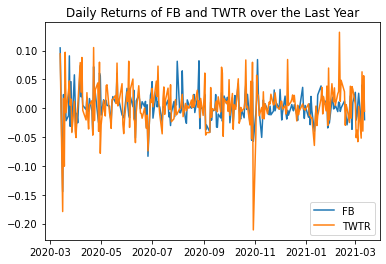

In [32]:
# Plot daily returns
df_daily_returns.plot(title="Daily Returns of FB and TWTR over the Last Year")